In [1]:
import numpy as np
np.random.seed(13)

from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import skipgrams

Using TensorFlow backend.


# Lecture des données et découpage des parties

In [2]:
corpus_all = open("./matchseqdata200k.csv").readlines()
corpus = [sentence.split(',')[2:] for sentence in corpus_all]

Construction du vocabulaires

In [3]:
cards = np.unique(np.concatenate(corpus))
cards = cards[cards!='\n']
V = len(cards)

Taille du vocabulaiure

In [4]:
V

1660

In [5]:
cards_dict = dict((cards[i],i) for i in xrange(0, V))

In [6]:
corpus_num = [[cards_dict[card] for card in game if card!='\n'] for game in corpus]

# Construction du réseau word2vec

In [8]:
vector_dim = 64
input_target = Input((1,), dtype='int32')
input_context = Input((1,), dtype='int32')

embedding_t = Embedding(V, vector_dim, input_length=1, name='embedding_t')
target = embedding_t(input_target)
target = Reshape((vector_dim, 1))(target)
embedding_c = Embedding(V, vector_dim, input_length=1, name='embedding_c')
context = embedding_c(input_context)
context = Reshape((vector_dim, 1))(context)

dot_product = Dot(axes=0)([target, context])
dot_product = Reshape((1,))(dot_product)

output = Dense(1, activation='sigmoid')(dot_product)
SkipGram = Model(inputs=[input_target, input_context], outputs=output)
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

In [9]:
import random
def match_ns_generator(corpus_num,nbm):
    while 1:
        Data=[]
        Labels=[]
        for i, doc in enumerate(random.sample(corpus_num,nbm)):
            data, labels = skipgrams(sequence=doc, vocabulary_size=V, window_size=3, negative_samples=2.)
            if (len(data)>0):
                Data.append(np.array(data, dtype=np.int32))
                Labels.append(np.array(labels, dtype=np.int32))
        Data=np.concatenate(Data)
        Labels=np.concatenate(Labels)
        x=[Data[:,0],Data[:,1]]
        y=Labels
        yield (x,y)

In [10]:
hist=SkipGram.fit_generator(match_ns_generator(corpus_num,10),200,100)

Epoch 1/100
200/200 [==============================] - 1s - loss: 0.6436     
Epoch 2/100
200/200 [==============================] - 1s - loss: 0.3874     
Epoch 3/100
200/200 [==============================] - 1s - loss: 0.2960     
Epoch 4/100
200/200 [==============================] - 1s - loss: 0.2570     
Epoch 5/100
200/200 [==============================] - 1s - loss: 0.2495     
Epoch 6/100
200/200 [==============================] - 1s - loss: 0.2292     
Epoch 7/100
200/200 [==============================] - 1s - loss: 0.2284     
Epoch 8/100
200/200 [==============================] - 1s - loss: 0.2209     
Epoch 9/100
200/200 [==============================] - 1s - loss: 0.2125     
Epoch 10/100
200/200 [==============================] - 1s - loss: 0.2122     
Epoch 11/100
200/200 [==============================] - 1s - loss: 0.2059     
Epoch 12/100
200/200 [==============================] - 1s - loss: 0.2037     
Epoch 13/100
200/200 [==============================] - 1s - 

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
mpl.rcParams['figure.figsize'] = (16,8)

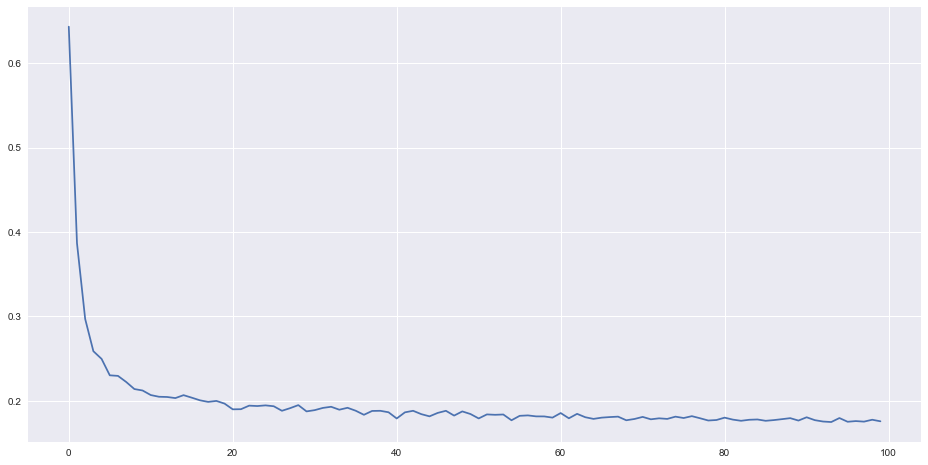

In [12]:
plt.plot(hist.history['loss'])

In [13]:
f = open('vectors200k.txt' ,'w')
f.write('{} {}\n'.format(V-1, vector_dim))
vectors = SkipGram.get_weights()[0]
for i, word in enumerate(cards):
    f.write('{} {}\n'.format(word.replace(" ","_"), ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [14]:
import pandas as pd
meta=pd.read_json("cards_meta.json")
meta

,armor,artist,attack,cardClass,classes,collectible,collectionText,cost,dbfId,durability,...,playRequirements,playerClass,race,rarity,referencedTags,set,spellDamage,targetingArrowText,text,type
0,NaN,Nutthapon Petchthai,NaN,MAGE,NaN,1.0,NaN,5.0,2539.0,NaN,...,"{u'REQ_MINION_TARGET': 0, u'REQ_TARGET_TO_PLAY...",MAGE,NaN,COMMON,NaN,TGT,NaN,NaN,Deal $8 damage to a minion.,SPELL
1,NaN,Tooth,NaN,MAGE,NaN,1.0,NaN,3.0,2541.0,NaN,...,NaN,MAGE,NaN,RARE,NaN,TGT,NaN,NaN,"<b>Secret:</b> When a friendly minion dies, su...",SPELL
2,NaN,Arthur Bozonnet,3.0,MAGE,NaN,1.0,NaN,2.0,2545.0,NaN,...,NaN,MAGE,NaN,RARE,NaN,TGT,NaN,NaN,Your Hero Power deals 1 extra damage.,MINION
3,NaN,Gabor Szikszai,NaN,MAGE,NaN,1.0,NaN,1.0,2572.0,NaN,...,"{u'REQ_MINION_TARGET': 0, u'REQ_TARGET_TO_PLAY...",MAGE,NaN,EPIC,[SPELLPOWER],TGT,NaN,NaN,Deal $2 damage to a minion. This spell gets do...,SPELL
4,NaN,Mike Sass,NaN,MAGE,NaN,1.0,NaN,3.0,2542.0,NaN,...,"{u'REQ_MINION_TARGET': 0, u'REQ_TARGET_TO_PLAY...",MAGE,NaN,RARE,[CHARGE],TGT,NaN,NaN,Transform a minion into a 4/2 Boar with <b>Cha...,SPELL
5,NaN,NaN,4.0,NEUTRAL,NaN,NaN,NaN,3.0,2543.0,NaN,...,NaN,NEUTRAL,BEAST,NaN,NaN,TGT,NaN,NaN,<b>Charge</b>,MINION
6,NaN,Dan Scott,3.0,MAGE,NaN,1.0,NaN,4.0,2549.0,NaN,...,NaN,MAGE,NaN,COMMON,[SPELLPOWER],TGT,NaN,NaN,<b>Inspire:</b> Gain <b>Spell Damage +1</b>.,MINION
7,NaN,NaN,NaN,MAGE,NaN,NaN,NaN,NaN,2550.0,NaN,...,NaN,MAGE,NaN,NaN,NaN,TGT,NaN,NaN,Increased Spell Damage.,ENCHANTMENT
8,NaN,Andrew Hou,3.0,MAGE,NaN,1.0,NaN,3.0,2571.0,NaN,...,NaN,MAGE,NaN,COMMON,NaN,TGT,NaN,NaN,<b>Battlecry:</b> Add a random spell to each p...,MINION
9,NaN,Christopher Moeller,6.0,MAGE,NaN,1.0,NaN,6.0,2544.0,NaN,...,NaN,MAGE,DRAGON,EPIC,NaN,TGT,NaN,NaN,You can use your Hero Power any number of times.,MINION


In [15]:
vectors = SkipGram.get_weights()[0]
useCards=pd.DataFrame({'name':cards,'v0':vectors[:,0],'v1':vectors[:,1],'v2':vectors[:,2]})
meta_sub=pd.merge(useCards,meta.drop_duplicates('name'),on='name')

In [16]:
classes=meta_sub["cardClass"].unique()
class_dict=dict((classes[i],i) for i in range(len(classes)))
meta_sub["card_class_num"]=meta_sub["cardClass"].apply(lambda c:class_dict[c])
cm=plt.get_cmap("tab20")

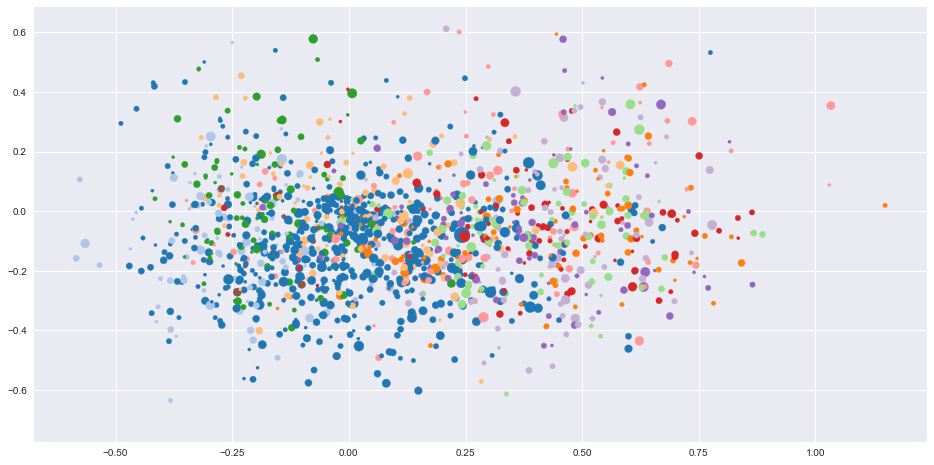

In [17]:
plt.scatter(meta_sub["v0"],meta_sub["v1"],s=meta_sub["cost"]*10,color=cm(meta_sub["card_class_num"]))

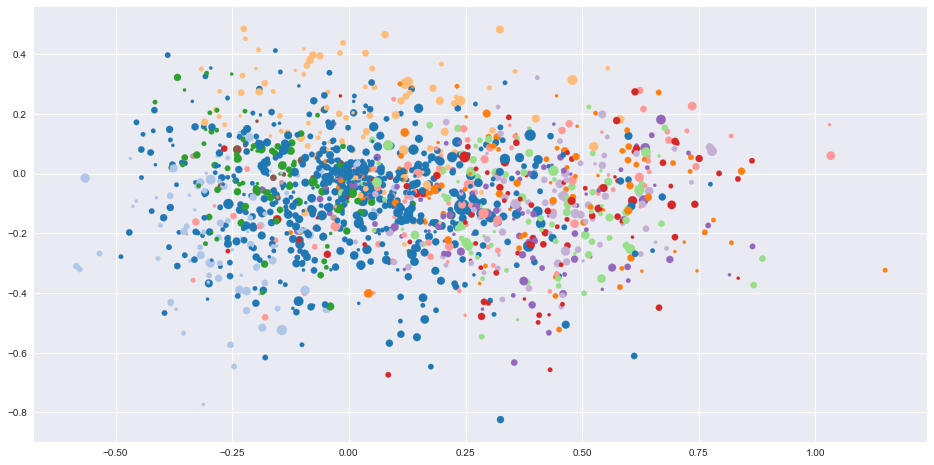

In [18]:
plt.scatter(meta_sub["v0"],meta_sub["v2"],s=meta_sub["cost"]*10,color=cm(meta_sub["card_class_num"]))

In [19]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(vectors)
X_embedded.shape

(1660, 2)

In [20]:
useCards=pd.DataFrame({'name':cards,'t0':X_embedded[:,0],'t1':X_embedded[:,1]})
meta_sub=pd.merge(useCards,meta.drop_duplicates('name'),on='name')

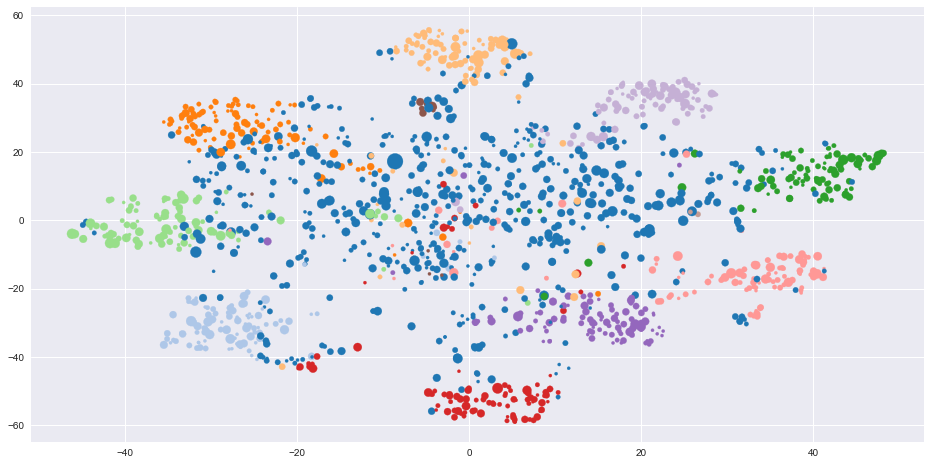

In [21]:
classes=meta_sub["cardClass"].unique()
class_dict=dict((classes[i],i) for i in range(len(classes)))
meta_sub["card_class_num"]=meta_sub["cardClass"].apply(lambda c:class_dict[c])
cm=plt.get_cmap("tab20")
plt.scatter(meta_sub["t0"],meta_sub["t1"],s=meta_sub["cost"]*10,color=cm(meta_sub["card_class_num"]))

In [196]:
meta_sub.to_csv("skip_gram_tsne200k.csv", encoding="UTF-8")

# Recherche de regles d'association entre cartes

In [27]:
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [34]:
corpus_cl = [[card for card in game if card!='\n'] for game in corpus]
corpus_cl

[['The Coin',
  'Fiery War Axe',
  'Blood To Ichor',
  'Fierce Monkey',
  "Kor'kron Elite",
  'Ravaging Ghoul',
  'Execute',
  "Kor'kron Elite",
  'Fiery War Axe',
  'Blackwing Corruptor',
  'Blackwing Corruptor',
  'Azure Drake',
  'Twilight Guardian',
  'Sir Finley Mrrgglton',
  'Blood To Ichor',
  'Drakonid Crusher',
  'Twilight Guardian',
  "N'Zoth's First Mate",
  'Ravaging Ghoul'],
 ['Tunnel Trogg',
  'Feral Spirit',
  'Flametongue Totem',
  'Totem Golem',
  'Thing from Below',
  'Argent Squire',
  'Flamewreathed Faceless',
  'Tuskarr Totemic',
  'Rockbiter Weapon',
  'Ancestral Knowledge',
  'Tunnel Trogg',
  'Totem Golem',
  'Thing from Below',
  'Rockbiter Weapon',
  'Flame Juggler',
  'Lightning Bolt',
  'Feral Spirit',
  'Argent Horserider',
  'Lightning Bolt'],
 ['The Coin',
  "Alexstrasza's Champion",
  'Fiery War Axe',
  'Ravaging Ghoul',
  'Sir Finley Mrrgglton',
  'Blackwing Corruptor',
  'Twilight Guardian',
  'Faerie Dragon',
  'Blood To Ichor',
  'Blood To Ichor',
  

In [35]:
oht = OnehotTransactions()
oht_ary = oht.fit(corpus_cl).transform(corpus_cl)
df = pd.DataFrame(oht_ary, columns=oht.columns_)

In [40]:
df.shape

(396238, 1660)

In [38]:
frequent_itemsets = apriori(df, min_support=0.025, use_colnames=True)

KeyboardInterrupt: 

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

# Analyse de l'exapce vectoriel de description

## Quelques exemple de requêtes similarité / analogie

In [25]:
import gensim
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors200k.txt', binary=False)

In [26]:
w2v.most_similar(positive=['Armor_Up!'])

[(u'Fiery_War_Axe', 0.8980605602264404),
 (u'Brawl', 0.7869135141372681),
 (u'Ravaging_Ghoul', 0.7867157459259033),
 (u'Forge_of_Souls', 0.7834479212760925),
 (u'Crush', 0.7819375395774841),
 (u'Shield_Block', 0.7800502777099609),
 (u'Bash', 0.7760571241378784),
 (u'Bloodhoof_Brave', 0.7752119302749634),
 (u"Death's_Bite", 0.7723432779312134),
 (u'Slam', 0.7712208032608032)]

In [27]:
sim=w2v.most_similar(positive=['Steady_Shot', 'Varian_Wrynn'], negative=['Armor_Up!'])
tt=pd.DataFrame(sim)
sim_df=pd.DataFrame({"name":tt[0].apply(lambda n:n.replace("_"," ")),"sim":tt[1]})
sim_df=pd.merge(sim_df,meta.drop_duplicates('name'),on='name')
sim_df[["name","sim","cardClass","type","cost","attack","health","text"]]

,name,sim,cardClass,type,cost,attack,health,text
0,Acidmaw,0.674603,HUNTER,MINION,7.0,4.0,2.0,"Whenever another minion takes damage, destroy it."
1,Ball of Spiders,0.669722,HUNTER,SPELL,6.0,NaN,NaN,Summon three 1/1 Webspinners.
2,Bestial Wrath,0.660563,HUNTER,SPELL,1.0,NaN,NaN,Give a friendly Beast +2 Attack and <b>Immune<...
3,Huffer,0.658031,HUNTER,MINION,3.0,4.0,2.0,<b>Charge</b>
4,Dreadscale,0.656190,HUNTER,MINION,3.0,4.0,2.0,"At the end of your turn, deal 1 damage to all ..."
5,Steamwheedle Sniper,0.654580,HUNTER,MINION,2.0,2.0,3.0,Your Hero Power can target minions.
6,Princess Huhuran,0.646123,HUNTER,MINION,5.0,6.0,5.0,<b>Battlecry:</b> Trigger a friendly minion's ...
7,Stablemaster,0.641064,HUNTER,MINION,3.0,4.0,2.0,<b>Battlecry:</b> Give a friendly Beast <b>Imm...
8,Powershot,0.635938,HUNTER,SPELL,3.0,NaN,NaN,Deal $2 damage to a minion and the minions nex...
9,Lock and Load,0.633210,HUNTER,SPELL,2.0,NaN,NaN,"Each time you cast a spell this turn, add a ra..."


In [28]:
sim=w2v.most_similar(positive=['Steady_Shot', 'Flametongue_Totem'], negative=['Totemic_Call'])
tt=pd.DataFrame(sim)
sim_df=pd.DataFrame({"name":tt[0].apply(lambda n:n.replace("_"," ")),"sim":tt[1]})
sim_df=pd.merge(sim_df,meta.drop_duplicates('name'),on='name')
sim_df[["name","sim","cardClass","type","cost","attack","health","text"]]

,name,sim,cardClass,type,cost,attack,health,text
0,Animal Companion,0.772825,HUNTER,SPELL,3.0,NaN,NaN,Summon a random Beast Companion.
1,Kill Command,0.767148,HUNTER,SPELL,3.0,NaN,NaN,"Deal $3 damage. If you control a Beast, deal\n..."
2,Unleash the Hounds,0.765869,HUNTER,SPELL,3.0,NaN,NaN,"For each enemy minion, summon a 1/1 Hound with..."
3,Explosive Trap,0.764168,HUNTER,SPELL,2.0,NaN,NaN,"<b>Secret:</b> When your hero is attacked, dea..."
4,Eaglehorn Bow,0.757350,HUNTER,WEAPON,3.0,3.0,NaN,[x]Whenever a friendly\n<b>Secret</b> is revea...
5,Professor Putricide,0.744551,NEUTRAL,HERO,NaN,NaN,30.0,NaN
6,Big Bad Wolf,0.739669,HUNTER,MINION,2.0,3.0,2.0,NaN
7,Savannah Highmane,0.738990,HUNTER,MINION,6.0,6.0,5.0,<b>Deathrattle:</b> Summon two 2/2 Hyenas.
8,Houndmaster,0.736163,HUNTER,MINION,4.0,4.0,3.0,<b>Battlecry:</b> Give a friendly Beast +2/+2 ...
9,Gahz'rilla,0.733699,HUNTER,MINION,7.0,6.0,9.0,"Whenever this minion takes damage, double its ..."


In [29]:
sim=w2v.most_similar(positive=['Steady_Shot', 'Windfury'], negative=['Totemic_Call'])
tt=pd.DataFrame(sim)
sim_df=pd.DataFrame({"name":tt[0].apply(lambda n:n.replace("_"," ")),"sim":tt[1]})
sim_df=pd.merge(sim_df,meta.drop_duplicates('name'),on='name')
sim_df[["name","sim","cardClass","type","cost","attack","health","text"]]

,name,sim,cardClass,type,cost,attack,health,text
0,Silithid Swarmer,0.704006,NEUTRAL,MINION,3.0,3.0,5.0,Can only attack if your hero attacked this turn.
1,Stablemaster,0.695898,HUNTER,MINION,3.0,4.0,2.0,<b>Battlecry:</b> Give a friendly Beast <b>Imm...
2,Piranha Launcher,0.678687,HUNTER,WEAPON,5.0,2.0,NaN,"[x]After your hero attacks,\nsummon a 1/1 Pira..."
3,Acidmaw,0.651499,HUNTER,MINION,7.0,4.0,2.0,"Whenever another minion takes damage, destroy it."
4,Forlorn Stalker,0.650588,HUNTER,MINION,3.0,4.0,2.0,<b>Battlecry:</b> Give all <b>Deathrattle</b> ...
5,Core Rager,0.646585,HUNTER,MINION,4.0,4.0,4.0,"<b>Battlecry:</b> If your hand is empty, gain ..."
6,Arcane Shot,0.641741,HUNTER,SPELL,1.0,NaN,NaN,Deal $2 damage.
7,Dart Trap,0.640669,HUNTER,SPELL,2.0,NaN,NaN,<b>Secret:</b> After an opposing Hero Power is...
8,Cobra Shot,0.635009,HUNTER,SPELL,5.0,NaN,NaN,Deal $3 damage to a minion and the enemy hero.
9,Misdirection,0.633088,HUNTER,SPELL,2.0,NaN,NaN,<b>Secret:</b> When an enemy attacks your hero...


In [30]:
sim=w2v.most_similar(positive=["Gahz'rilla", "C'Thun's_Chosen"], negative=["C'Thun"])
tt=pd.DataFrame(sim)
sim_df=pd.DataFrame({"name":tt[0].apply(lambda n:n.replace("_"," ")),"sim":tt[1]})
sim_df=pd.merge(sim_df,meta.drop_duplicates('name'),on='name')
sim_df[["name","sim","cardClass","type","cost","attack","health","text"]]

,name,sim,cardClass,type,cost,attack,health,text
0,Snake,0.875436,HUNTER,MINION,1.0,1.0,1.0,NaN
1,Spider,0.823119,HUNTER,MINION,1.0,1.0,1.0,NaN
2,Big Bad Wolf,0.822711,HUNTER,MINION,2.0,3.0,2.0,NaN
3,Steamwheedle Sniper,0.818254,HUNTER,MINION,2.0,2.0,3.0,Your Hero Power can target minions.
4,Malorne,0.816947,DRUID,MINION,7.0,9.0,7.0,<b>Deathrattle:</b> Shuffle this minion into y...
5,Cat in a Hat,0.816743,HUNTER,MINION,3.0,4.0,2.0,<b>Stealth</b>
6,Grotesque Dragonhawk,0.815386,NEUTRAL,MINION,7.0,5.0,5.0,<b>Windfury</b>
7,Misha,0.801585,HUNTER,MINION,0.0,4.0,4.0,<b>Taunt</b>
8,King of Beasts,0.799415,HUNTER,MINION,5.0,2.0,6.0,<b>Taunt</b>. <b>Battlecry:</b> Gain +1 Attack...
9,Tabbycat,0.795876,HUNTER,MINION,1.0,1.0,1.0,NaN


## Encodage des information numérique / catégorielle sur les cartes ?
Predire le cout, l'attaque la défense, la catégorie à l'aide de classifieur simples

## Modèles de prédiction de résultats des matchs

In [31]:
match_results = [sentence.split(',')[1] for sentence in corpus_all]
y=np.array(np.array(match_results)=='win',np.int)

In [33]:
# nombre de serie
nbseries=len(y)
nbseries

396238

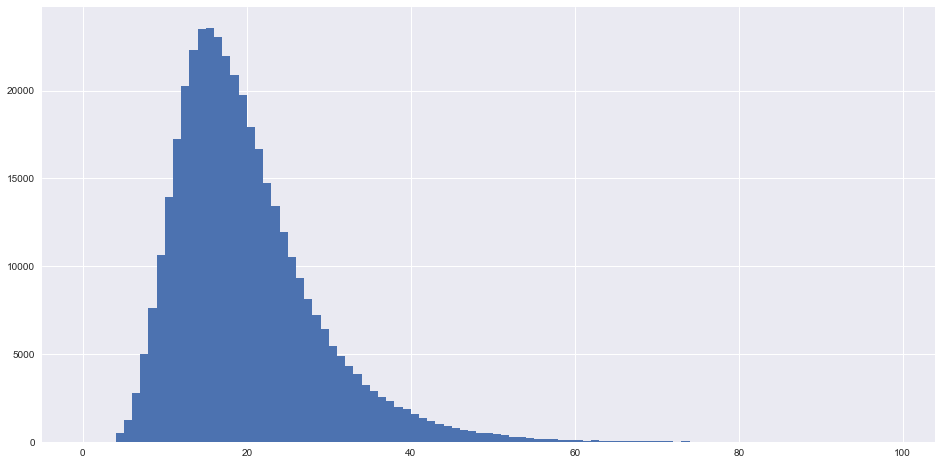

In [34]:
# longueur des series
sl = np.array([len(sentence.split(',')) for sentence in corpus_all])
hi=plt.hist(sl[sl<100],range(100))

In [35]:
X = np.zeros((nbseries,80))
Y = np.zeros((nbseries,80,1))

In [36]:
for s in range(nbseries):
    for c in range(np.min([len(corpus_num[s]),80])):
        if(len(corpus_num[s])>5):
            X[s,c]=corpus_num[s][c]
            Y[s,c,0]=y[s]

In [ ]:
from keras.layers import *
nbneurones = 200
cards=Input(shape=(80,), dtype='int32')
embedding = Embedding(V, vector_dim, input_length=80, name='embedding',mask_zero=True,weights=[SkipGram.get_weights()[0]],trainable=False)
target = embedding(cards)
gruG = GRU(nbneurones,return_sequences=True, input_shape=(80, vector_dim),activation='relu')(target)
pred = TimeDistributed(Dense(1,activation='sigmoid'))(gruG)
gru  = Model(inputs=cards,outputs=pred)
gru.compile(loss='binary_crossentropy', optimizer='adam',metrics=["acc"])

In [ ]:
gru.fit(X,Y,epochs=10)

In [37]:
ival = np.random.choice(nbseries,int(np.round(0.05*nbseries)), replace=False)
Xval = X[ival,:]
yval = y[ival]
iapp = np.setdiff1d(range(nbseries),ival)
Xapp = X[iapp,:]
yapp = y[iapp]

In [50]:
def match_seq_generator(Xapp,yapp,nbm):
    while 1:
        ns = Xapp.shape[0]-1
        ibatch = np.random.choice(ns,nbm, replace=False)
        yield (Xapp[ibatch,:],yapp[ibatch])

In [55]:
from keras.layers import *
nbneurones = 400
cards=Input(shape=(80,), dtype='int32')
embedding = Embedding(V, vector_dim, input_length=80, name='embedding',mask_zero=True,weights=[SkipGram.get_weights()[0]],trainable=False)
target = embedding(cards)
gruG = GRU(nbneurones, input_shape=(80, vector_dim))(target)
pred = Dense(1,activation='sigmoid')(gruG)
gruLast  = Model(inputs=cards,outputs=pred)
gruLast.compile(loss='binary_crossentropy', optimizer='adam',metrics=["acc"])

In [56]:
gruLast.fit_generator(match_seq_generator(Xapp,yapp,50),200,epochs=60,validation_data=[Xval,yval])

Epoch 1/60
200/200 [==============================] - 85s - loss: 0.6742 - acc: 0.5810 - val_loss: 0.6619 - val_acc: 0.6092
Epoch 2/60
200/200 [==============================] - 89s - loss: 0.6559 - acc: 0.6113 - val_loss: 0.6467 - val_acc: 0.6275
Epoch 3/60
200/200 [==============================] - 85s - loss: 0.6517 - acc: 0.6221 - val_loss: 0.6523 - val_acc: 0.6080
Epoch 4/60
200/200 [==============================] - 85s - loss: 0.6411 - acc: 0.6352 - val_loss: 0.6583 - val_acc: 0.6120
Epoch 5/60
200/200 [==============================] - 85s - loss: 0.6431 - acc: 0.6303 - val_loss: 0.6396 - val_acc: 0.6354
Epoch 6/60
200/200 [==============================] - 85s - loss: 0.6382 - acc: 0.6354 - val_loss: 0.6349 - val_acc: 0.6418
Epoch 7/60
200/200 [==============================] - 84s - loss: 0.6340 - acc: 0.6386 - val_loss: 0.6328 - val_acc: 0.6448
Epoch 8/60
200/200 [==============================] - 85s - loss: 0.6326 - acc: 0.6387 - val_loss: 0.6287 - val_acc: 0.6488
Epoch 9/

In [57]:
df=pd.read_csv("./matchs200k.csv",header=None)
df.columns=["gid","player","name","result","turn","cardid"]

In [61]:
df["w"]=1
nbc=df[["gid","w"]].groupby("gid").sum()

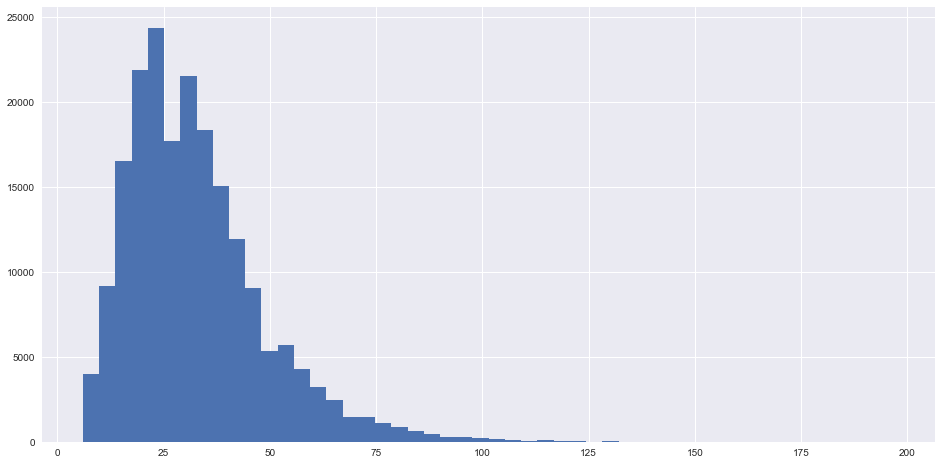

In [67]:
h=plt.hist(nbc.loc[nbc["w"]<200,"w"],50)

In [200]:
nbgames    = int(df["gid"].max())+1
gamelength = 125

In [201]:
df["resnum"]=(df["result"]=="win")
df["playernum"]=(df["player"]=="me")
dfr=df[["gid","resnum"]].groupby("gid").max()
ym=np.array(dfr["resnum"],np.int)

In [219]:
Xc = np.zeros((nbgames,gamelength))
Xp = np.zeros((nbgames,gamelength,1))
Ym = np.zeros((nbgames,gamelength,1))

In [220]:
df['cardnum'] = df.groupby(['gid']).cumcount()

In [221]:
cards = df["name"].unique()
V = len(cards)
cards_dict = dict((cards[i-1],i) for i in xrange(1, V+1))

In [222]:
dfc    = df.loc[df['cardnum']<125,:]
gind   = np.array(dfc["gid"],np.int)
cind   = np.array(dfc["cardnum"],np.int)
def encodecard(c):
        return cards_dict[c]
card   = np.array(dfc["name"].apply(encodecard),np.int)
player = np.array(dfc["player"]=="me",np.int)

In [223]:
Xc[gind,cind]=card
Xp[gind,cind,0]=player

In [224]:
for g in range(nbgames):
    Ym[g,:,0]=ym[g]

In [165]:
nbneurones = 400
vector_dim = 64
cards=Input(shape=(gamelength,), dtype='int32')
embedding = Embedding(V+1, vector_dim, input_length=gamelength, name='embedding',mask_zero=True)
target = embedding(cards)
player=Input(shape=(gamelength,1,))
x = Concatenate()([target,player])
gruG = GRU(nbneurones, input_shape=(gamelength, vector_dim+1))(x)
pred = Dense(1,activation='sigmoid')(gruG)
gruLast  = Model(inputs=[cards,player],outputs=pred)
gruLast.compile(loss='binary_crossentropy', optimizer='adam',metrics=["acc"])

In [225]:
ival = np.random.choice(nbgames,int(np.round(0.02*nbgames)), replace=False)
Xcval = Xc[ival,:]
Xpval = Xp[ival,:,:]
ymval = ym[ival]
Ymval = Ym[ival,:,:]
iapp = np.setdiff1d(range(nbgames),ival)
Xcapp = Xc[iapp,:]
Xpapp = Xp[iapp,:,:]
ymapp = ym[iapp]
Ymapp = Ym[iapp,:,:]

In [167]:
def match_seq_generator(Xcapp,Xpapp,ymapp,nbm):
    while 1:
        ns = Xcapp.shape[0]
        ibatch = np.random.choice(ns,nbm, replace=False)
        yield ([Xcapp[ibatch,:],Xpapp[ibatch,:,:]],ymapp[ibatch])

In [168]:
#gruLast.fit(x=[Xcapp,Xpapp],y=ymapp,epochs=1)
hist=gruLast.fit_generator(match_seq_generator(Xcapp,Xpapp,ymapp,50),100,epochs=60,validation_data=[[Xcval,Xpval],ymval])

Epoch 1/60
100/100 [==============================] - 51s - loss: 0.6405 - acc: 0.6724 - val_loss: 0.6065 - val_acc: 0.7140
Epoch 2/60
100/100 [==============================] - 51s - loss: 0.5867 - acc: 0.7280 - val_loss: 0.5982 - val_acc: 0.7140
Epoch 3/60
100/100 [==============================] - 51s - loss: 0.5990 - acc: 0.7058 - val_loss: 0.5912 - val_acc: 0.7140
Epoch 4/60
100/100 [==============================] - 50s - loss: 0.5797 - acc: 0.7170 - val_loss: 0.5673 - val_acc: 0.7234
Epoch 5/60
100/100 [==============================] - 50s - loss: 0.5448 - acc: 0.7348 - val_loss: 0.5229 - val_acc: 0.7433
Epoch 6/60
100/100 [==============================] - 50s - loss: 0.5393 - acc: 0.7396 - val_loss: 0.5113 - val_acc: 0.7479
Epoch 7/60
100/100 [==============================] - 50s - loss: 0.4989 - acc: 0.7610 - val_loss: 0.4816 - val_acc: 0.7711
Epoch 8/60
100/100 [==============================] - 51s - loss: 0.4859 - acc: 0.7720 - val_loss: 0.4678 - val_acc: 0.7766
Epoch 9/

In [169]:
vectors = gruLast.get_weights()[0]

In [170]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(vectors)
X_embedded.shape

(1642, 2)

In [174]:
useCards=pd.DataFrame({'name':df["name"].unique(),'t0':X_embedded[1:,0],'t1':X_embedded[1:,1]})
meta_sub=pd.merge(useCards,meta.drop_duplicates('name'),on='name')

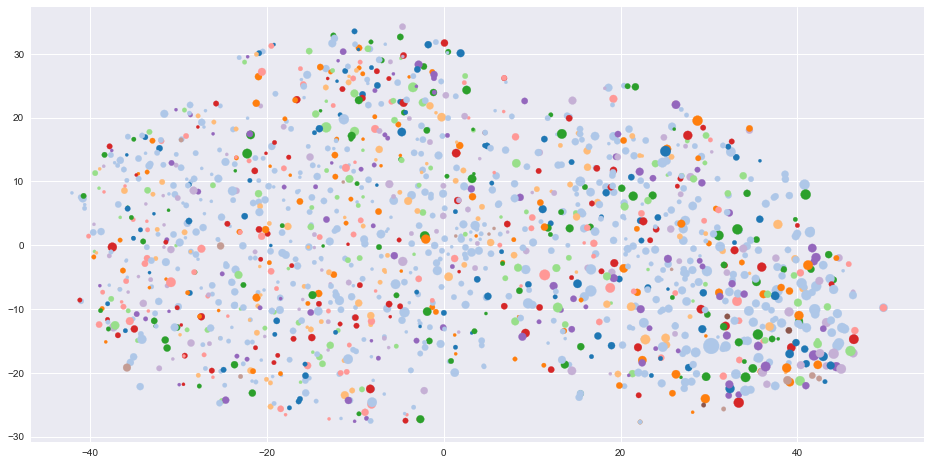

In [175]:
classes=meta_sub["cardClass"].unique()
class_dict=dict((classes[i],i) for i in range(len(classes)))
meta_sub["card_class_num"]=meta_sub["cardClass"].apply(lambda c:class_dict[c])
cm=plt.get_cmap("tab20")
plt.scatter(meta_sub["t0"],meta_sub["t1"],s=meta_sub["cost"]*10,color=cm(meta_sub["card_class_num"]))

In [227]:
def match_seq_generator(Xcapp,Xpapp,ymapp,nbm):
    while 1:
        ns = Xcapp.shape[0]
        ibatch = np.random.choice(ns,nbm, replace=False)
        yield ([Xcapp[ibatch,:],Xpapp[ibatch,:,:]],ymapp[ibatch,:,:])

In [228]:
nbneurones = 400
vector_dim = 64
cards=Input(shape=(gamelength,), dtype='int32')
embedding = Embedding(V+1, vector_dim, input_length=gamelength, name='embedding',mask_zero=True)
target = embedding(cards)
player=Input(shape=(gamelength,1,))
x = Concatenate()([target,player])
gruG = GRU(nbneurones, return_sequences=True,input_shape=(gamelength, vector_dim+1))(x)
pred = TimeDistributed(Dense(1,activation='sigmoid'))(gruG)
gruFull  = Model(inputs=[cards,player],outputs=pred)
gruFull.compile(loss='binary_crossentropy', optimizer='adam',metrics=["acc"])

In [229]:
hist=gruFull.fit_generator(match_seq_generator(Xcapp,Xpapp,Ymapp,100),100,epochs=100,validation_data=[[Xcval,Xpval],Ymval])

Epoch 1/100
100/100 [==============================] - 85s - loss: 0.6905 - acc: 0.5353 - val_loss: 0.6909 - val_acc: 0.5310
Epoch 2/100
100/100 [==============================] - 83s - loss: 0.6894 - acc: 0.5385 - val_loss: 0.6909 - val_acc: 0.5313
Epoch 3/100
100/100 [==============================] - 85s - loss: 0.6879 - acc: 0.5461 - val_loss: 0.6908 - val_acc: 0.5330
Epoch 4/100
100/100 [==============================] - 83s - loss: 0.6905 - acc: 0.5302 - val_loss: 0.6899 - val_acc: 0.5340
Epoch 5/100
100/100 [==============================] - 84s - loss: 0.6892 - acc: 0.5371 - val_loss: 0.6890 - val_acc: 0.5361
Epoch 6/100
100/100 [==============================] - 84s - loss: 0.6861 - acc: 0.5537 - val_loss: 0.6897 - val_acc: 0.5385
Epoch 7/100
100/100 [==============================] - 84s - loss: 0.6914 - acc: 0.5326 - val_loss: 0.6871 - val_acc: 0.5424
Epoch 8/100
100/100 [==============================] - 83s - loss: 0.6804 - acc: 0.5652 - val_loss: 0.6783 - val_acc: 0.5715


100/100 [==============================] - 82s - loss: 0.6160 - acc: 0.6543 - val_loss: 0.6493 - val_acc: 0.6173
Epoch 67/100
100/100 [==============================] - 82s - loss: 0.6213 - acc: 0.6472 - val_loss: 0.6446 - val_acc: 0.6225
Epoch 68/100
100/100 [==============================] - 83s - loss: 0.6141 - acc: 0.6539 - val_loss: 0.6439 - val_acc: 0.6244
Epoch 69/100
100/100 [==============================] - 82s - loss: 0.6152 - acc: 0.6540 - val_loss: 0.6455 - val_acc: 0.6214
Epoch 70/100
100/100 [==============================] - 83s - loss: 0.6112 - acc: 0.6566 - val_loss: 0.6494 - val_acc: 0.6201
Epoch 71/100
100/100 [==============================] - 83s - loss: 0.6136 - acc: 0.6569 - val_loss: 0.6494 - val_acc: 0.6205
Epoch 72/100
100/100 [==============================] - 83s - loss: 0.6123 - acc: 0.6569 - val_loss: 0.6559 - val_acc: 0.6149
Epoch 73/100
100/100 [==============================] - 83s - loss: 0.6146 - acc: 0.6545 - val_loss: 0.6481 - val_acc: 0.6195
Epoch